In [1]:
## Lab 1: 1d eigen value problem

# Solving the 1-D Eigenvalue Equation  
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi $$  
## Reduction to dimensionless form  
 Assume natural length scale $l_0$. Let $x=l_0 y$. Substituting gives  
 $$ -\frac{\hbar^2}{2ml_0^2} \frac{d^2\psi}{dy^2} + V(x)\psi = E \psi $$  
 Use $E_0 = \hbar^2/2ml_0^2$ as a natural energy scale. Dividing throughout by $E_0$ gives  
  $$ -\frac{d^2\psi}{dy^2} + U(y)\psi = \epsilon \psi $$  
  where $U(y)=V(l_0 y)/E_0$ and $\epsilon=E/E_0$. The wavefunction satisfies the constraint  
  $$ \int dx |\psi|^2 = 1 $$.  
  We define a dimensionless wavefunction $\phi = \sqrt{l_0}\times \psi$. This 
  satisfies  
  $$ \int dy |\phi|^2 = 1 $$.
  
## Discretization  
We assume that $x \in [-L,L]$. Then, $y \in [-\tilde{L},\tilde{L}]$ where $\tilde{L}=L/l_0$.  
Divide the interval $[-\tilde{L},\tilde{L}]$ into $N$ segments with lattice points labelled by an 
integer $i$ such that $y_i = i\times \Delta$ where $\Delta = 2\tilde{L}/N$. Using the symmetric difference for the 
second derivative in the eigenvalue equation gives (at $y_i$)  
$$-\frac{1}{\Delta^2}\left(\phi_{i+1}-2\phi_i+\phi_{i-1}\right) + U_i \phi_i = \epsilon \phi_i $$  
This equation can be cast in the matrix form  
$$H \phi = \epsilon \phi $$
where the matrix $H$ has elements  
$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  
At this point, the eigenvalues and eigenvectors of $H$ can be determined using numpy.  
The normalization constraint on the eigenvectors $\phi$ is  
 $$ \int dy |\phi|^2 = 1 $$  
 which, in discrete form, reduces to
 $$ \Delta \sum_i |\phi_i|^2 = 1 $$

## Example: Harmonic Oscillator

$$V(x) = \frac{1}{2}m\omega^2 x^2$$ 
The natural energy scale is $E_0 = \hbar\omega/2$. The associated length scale $l_0$ can be found using  $E_0 = \hbar^2/2ml_0^2$, which gives $l_0 = \sqrt{\hbar/m\omega}$. The dimensionless eigenvalue equation is  
$$-\frac{d^2\phi}{dy^2} + y^2\phi = \epsilon \phi $$ 

In [2]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [3]:
delta = 0.01
L = 6. 
N = 600 # No. of lattice points is 2N+1
x = np.arange(-6.,6.+delta,delta)
print(len(x))

1201


In [4]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
  return z**2
  # else :
  #   return -5

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [5]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
print(len(H))
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)

H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
# print(H_eigenvalues)
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

1201


In [6]:
potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

[1.27829679e-10 2.56107126e-10 3.85277980e-10 ... 3.85281540e-10
 2.56109875e-10 1.27831197e-10]
[-1.05477471e-09 -2.11302959e-09 -3.17823198e-09 ...  3.17822795e-09
  2.11302648e-09  1.05477278e-09]
[-6.05778402e-09 -1.21343472e-08 -1.82483814e-08 ... -1.82483789e-08
 -1.21343456e-08 -6.05778328e-09]
[ 2.79384078e-08  5.59578372e-08  8.41388742e-08 ... -8.41388712e-08
 -5.59578348e-08 -2.79384064e-08]
[1.09642897e-07 2.19581832e-07 3.30111011e-07 ... 3.30111013e-07
 2.19581833e-07 1.09642897e-07]


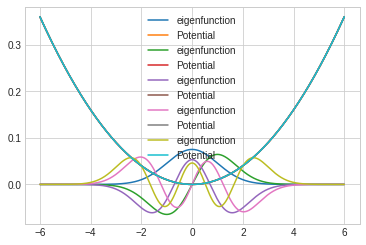

In [7]:
for i in range(0,5):
  psi = H_eigenvectors[:,i]
  print(psi)
  plt.plot(x,psi,label = 'eigenfunction')
  plt.plot(x,potential,label = 'Potential')
  plt.legend()

In [8]:
psi = H_eigenvectors[:,0] # Ground state wavefunction

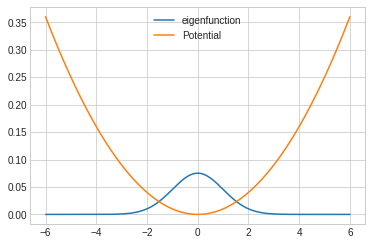

In [9]:
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [10]:
psi.conj().T # Hermitian adjoint of psi

array([1.27829679e-10, 2.56107126e-10, 3.85277980e-10, ...,
       3.85281540e-10, 2.56109875e-10, 1.27831197e-10])

In [11]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [12]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue) 

0.9999937499654187


## Square potential Well
$$ V(X) = - V_0 ; -a < x < a$$
$$        = 0     ; -a > x > a$$

In [13]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [14]:
delta = 0.01
L = 6. 
N = 600 # No. of lattice points is 2N+1
x = np.arange(-6.,6.+delta,delta)
print(len(x))

1201


In [15]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
  if -L<z<L:
    return -10
  else :
    return 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [16]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
# print(H)
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)

H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
# print(H_eigenvalues)
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [17]:
potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

[0.00010651 0.00021312 0.00031973 ... 0.00031973 0.00021312 0.00010651]
[-0.00021301 -0.00042623 -0.00063944 ...  0.00063944  0.00042623
  0.00021301]
[-0.00031952 -0.00063933 -0.00095911 ... -0.00095911 -0.00063933
 -0.00031952]
[-0.00042602 -0.00085241 -0.00127872 ...  0.00127872  0.00085241
  0.00042602]
[0.00053252 0.00106547 0.00159825 ... 0.00159825 0.00106547 0.00053252]


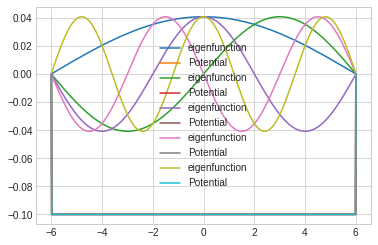

In [18]:
for i in range(0,5):
  psi = H_eigenvectors[:,i]
  print(psi)
  plt.plot(x,psi,label = 'eigenfunction')
  plt.plot(x,potential,label = 'Potential')
  plt.legend()

In [19]:
psi = H_eigenvectors[:,0] # Ground state wavefunction

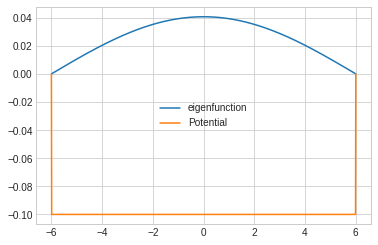

In [20]:
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [21]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [22]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue) 

-9.931688785525495
